In [2]:
import pandas as pd
import numpy as np 

In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


### Common columns
### Commons  -  "Title", "Category", "Price", "URL", "Subcategory","Description",'Business','Country', 'Location', 'Dimensions', 'Stock', 'DateOfListing', 'Imagefiles','LastUpOn'

#### Belgium 
'SellerID', 'SellersStockID'', 'Imagefiles',
'LastUpOn'', 'Weight', 'Weight_Units','Product_Units', 'Imagefile',
'Initial_Price', 'Latest_Price', 'Initial_Stock', 'Stock_Now',
'Condition', 'Dates_Available', 'Material', 'Technical',
'Collection', 'Price_Change', 'Quantity_Change', 
'Store', 'Language', 'Sold', 'Sold_After', 'material', 'dim',
'quantity_n'

#### French
'BIM_class', 'location',
'date_published', 'price_initial', 'price_latest', 'price_change',
'imagefiles', 'material_type', 'co2', 'avoided_waste',
'quantity_initial', 'quantity_latest', 'disappeared', 'country', 'sold',
'sold_after', 'city', 'deconstruction', 'state', 'constraints',
'images', 'distance', 'rseSummary', 'promotion',
'source', 'conditioning', 'rate', 'diag_it', 'showroom',
'avoidedWastes', 'trustLevel', 'quantity', 'min_quantity', 'end_date',
'pickup_start_date', 'pickup_end_date', 'deposit_mode',
'object', 'material', 'dim', 'quantity_n'

#### Swiss 
'['Imagefiles','LastUpOn'', 'Condition', 'eBKP_H',
       'eBKP_H_EN', 'MateriuumCategory','Material', 'Length', 'Width', 'Height',
       'Diameter', 'Weight', 'Color', 'Energy_Efficiency', 'Availability',
       'FirstPrice', 'PriceOnDemand', 'Quantity', 'Saved',
       'LastUpOn', 'PriceChange', 'Sold', 'SoldAfter', 'Provider',
       'Store', 'ID', 'Country', 'Language', 'Imagefile', 'URL',
       'eBKP_H_Generalized', 'ElementType', 'Price', 'Stock', 'Dimensions',
       'material', 'dim', 'quantity_n'],
      dtype='object'
#### Danish 
'ID', 'Imagefile','Thickness', 'Thickness_unit', 'Door frame', 'Quantity', 'LastPrice',
        'Saved', 'LastUpOn', 'Hanging', 'Width w/frame', 'Width w/frame_unit',
        'Height w/frame', 'Height w/frame_unit', 'Frame thickness',
        'Frame thickness_unit', 'FirstPrice', 'PriceChange',
        'Rail', 'Old glass', 'With corner band', 'Glass', 'Defective glass',
        'Material', 'Installed before', 'Year of manufacture_unit',
        'For built-in', 'Over rebated', 'With angle hinges', 'Connected',
        'With extender bar', 'Convectors', 'Convectors_unit', 'Suspension bracket', 'With thermostat',
        'Press tested', 'Store', ],

#### GERMANY 
 'Condition', 'MinAmount',
       'Location', 'Manufacturer', 'Properties', 'FirstPriceNumeric',
       'FirstAvailableNumeric', 'LastPriceNumeric', 'LastAvailableNumeric',
       'LastPrice', 'LastAvailable', 'Sold', 'SoldAfter'

#### UK 
'Name', 'URL', 'Price', 'Business', 'Category', 'Subcategory',
       'Country', 'Location', 'Description', 'Dimensions', 'Age', 'ItemID',
       'SellerID', 'SellersStockID', 'DateOfListing', 'Imagefiles',
       'LastUpOn'

# Merge everything 

- Give you the list of common columns 
- EPD Again and look more tourghly


In [4]:

ifc = pd.read_csv("data/IFC_processed.csv")

belgium = pd.read_csv("data/belgian_tr.csv")
french = pd.read_json("data/fr_datatr.json")
swiss = pd.read_csv("data/swiss_tr.csv")
danish = pd.read_json("data/dk_datatr.json")
german = pd.read_json('data/german1tr.json')
uk = pd.read_json('data/uk_datatr.json')

# IFC
+ For each component you a list caracteristics 

# Uniclass
- Bulk list of params
# calculate the similarity between cosin with all thre if its low ifc just put in uiclass and display 

In [11]:
from deep_translator import GoogleTranslator
from tqdm import tqdm
tqdm.pandas()

embeddings = model.encode(ifc.IFC)
# Function to translate text using Google Translate
def translate_text(text, src_lang='auto', dest_lang='en'):
    return GoogleTranslator(source=src_lang, target=dest_lang).translate(text) 
belgium["Title"].fillna("", inplace=True)
belgium["Title_en"] = belgium["Title"].progress_apply(translate_text)

 73%|███████▎  | 1442/1974 [04:56<02:29,  3.55it/s]

In [8]:
#belgium["Title"].fillna("", inplace=True)
french["title"].fillna("", inplace=True)
swiss["Title"].fillna("", inplace=True)
danish["Title"].fillna("", inplace=True)
german["Title"].fillna("", inplace=True)

#belgium["Title"] = belgium["Title"].apply(translate_text)
french["title"] = french["title"].progress_apply(translate_text)
swiss["Title"] = swiss["Title"].progress_apply(translate_text)
danish["Title"] = danish["Title"].progress_apply(translate_text)
german["Title"] = german["Title"].progress_apply(translate_text)

belgium_embeddings = model.encode(belgium["Title"])
french_embeddings = model.encode(french["title"])
swiss_embeddings = model.encode(swiss["Title"])
danish_embeddings = model.encode(danish["Title"])
german_embeddings = model.encode(german["Title"])
uk_embeddings = model.encode(uk["Name"])

0                              Brusselse klampsteen brick
1                                 "Beerse Steen 65" brick
2                             Beerse Steen rijnvorm brick
3                                Batches of yellow bricks
4                       Batch of concrete building blocks
                              ...                        
1969                Laminated birch plywood (120 x 85 cm)
1970                 Laminated birch plywood (85 x 60 cm)
1971                Laminated birch plywood (100 x 85 cm)
1972                Laminated birch plywood (145 x 85 cm)
1973    Blue laminated particule board table top (80 x...
Name: Title, Length: 1974, dtype: object

In [ ]:
uni_mat_ma = pd.read_excel("data/Uniclass2015_Ma_v1_1.xlsx", header=2)
uni_mat_pr = pd.read_excel("data/Uniclass2015_Pr.xlsx", header=2)
embeddings = model.encode(ifc.IFC)
embeddings_uni = model.encode(uni_mat_pr.Title)
embeddings_uni_ma = model.encode(uni_mat_ma.Title)

In [ ]:
belgium = belgium.to_csv("data/belgian_tr.csv")
french = french.to_csv("data/fr_datatr.csv")
swiss = swiss.to_csv("data/swiss_tr.csv")
danish = danish.to_csv("data/dk_datatr.csv")
german = german.to_csv('data/german1tr.csv')
uk = uk.to_csv('data/uk_datatr.csv')

In [ ]:
codes = pd.DataFrame(pd.concat([ifc.IFC, uni_mat_pr.Title, uni_mat_ma.Title], axis=0))
codes = codes.reset_index(drop=True)
codes.columns = ["raw"]

In [ ]:
result = np.concatenate([embeddings, embeddings_uni, embeddings_uni_ma], axis=0)

In [ ]:
codes.raw

NameError: name 'codes' is not defined

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

belgium_similarity = cosine_similarity(belgium_embeddings, result)
french_similarity = cosine_similarity(french_embeddings, result)
swiss_similarity = cosine_similarity(swiss_embeddings, result)
danish_similarity = cosine_similarity(danish_embeddings, result)
german_similarity = cosine_similarity(german_embeddings, result)
uk_similarity = cosine_similarity(uk_embeddings, result)


num_top_indices = 1  

top_indices_belgium = [np.argmax(row) for row in belgium_similarity]
top_indices_french = [np.argmax(row) for row in french_similarity]
top_indices_swiss = [np.argmax(row) for row in swiss_similarity]
top_indices_danish = [np.argmax(row) for row in danish_similarity]
top_indices_german = [np.argmax(row) for row in german_similarity]
top_indices_uk = [np.argmax(row) for row in uk_similarity]


belgium_raw_values = codes.iloc[top_indices_belgium]['raw'].tolist()
french_raw_values = codes.iloc[top_indices_french]['raw'].tolist()
swiss_raw_values = codes.iloc[top_indices_swiss]['raw'].tolist()
danish_raw_values = codes.iloc[top_indices_danish]['raw'].tolist()
german_raw_values = codes.iloc[top_indices_german]['raw'].tolist()
uk_raw_values = codes.iloc[top_indices_uk]['raw'].tolist()

NameError: name 'belgium_embeddings' is not defined

In [ ]:
# Add these as new columns to your DataFrame
belgium['Belgium_Raw'] = belgium_raw_values
french['French_Raw'] = french_raw_values
swiss['Swiss_Raw'] = swiss_raw_values
danish['Danish_Raw'] = danish_raw_values
german['German_Raw'] = german_raw_values
uk['Uk_Raw'] = uk_raw_values

NameError: name 'belgium_raw_values' is not defined

In [ ]:
unique_count_german = german['German_Raw'].value_counts()
unique_count_german.head(20)

KeyError: 'German_Raw'

In [ ]:
unique_count = belgium['Belgium_Raw'].value_counts()
unique_count.head(20)

Wood panelled door leaves          141
light  fixture                      87
Pendant luminaires                  86
Cabinet and countertop hinges       62
Terrazzo tiles                      57
Wood door frames                    41
Ceiling light switches              31
Coloured glass                      29
chair                               23
Bonding coats                       22
Bathroom cabinets                   21
Stone tiles                         18
Prismatic glass                     16
Laminboard core plywoods            15
Sinks                               15
Wood doorsets                       14
Aluminium alloy hinged bollards     14
Ceramic tiles                       13
Patterned glass                     13
Reflective glass                    13
Name: Belgium_Raw, dtype: int64

In [ ]:
unique_count_french = french['French_Raw'].value_counts()
unique_count_french.head(20)

Pisé                        371
Pliable conduit             303
Clinker                     214
door                        210
Double slips                171
Sliding shutter doorsets    136
Water heaters               129
Pendant luminaires          129
abutment                    122
Arrises                     122
Sitka spruce                107
table                        99
chair                        99
electrical                   93
Radiators                    87
Lamprey tiles                85
Murals                       77
parapet                      71
ceiling                      66
Bureaux                      64
Name: French_Raw, dtype: int64

In [ ]:
unique_count = swiss['Swiss_Raw'].value_counts()
unique_count.head(20)

KeyError: 'Swiss_Raw'

In [ ]:
unique_count_danish = danish['Danish_Raw'].value_counts()
unique_count_danish.head(20)

KeyError: 'Danish_Raw'

In [ ]:
unique_count = uk['Uk_Raw'].value_counts()
unique_count.head(20)

KeyError: 'Uk_Raw'

### Germany


In [ ]:
german['SoldAfterDays'] = german['SoldAfter'] / 86400000 
german

,Nr,URL,Title,Category,Subcategory,Saved,LastUpOn,Description,Zustand,FirstPrice,...,FirstPriceNumeric,FirstAvailableNumeric,LastPriceNumeric,LastAvailableNumeric,LastPrice,LastAvailable,Sold,SoldAfter,Imagefile,SoldAfterDays
0,121613,https://restado.de/baustoff/eigenbau/,Eigenbau,Türen & Zargen,Außentüren,1673222400000,NaN,Biete hier eine Hauseingangstür Eigenbau Massi...,Neuwertig,1€ (VB) / Stück,...,1.00,1.0,1.00,1.0,1€ (VB) / Stück,1 Stück verfügbar,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,NaN
1,120516,https://restado.de/baustoff/stabile-holztuer/,Stabile Holztür,Türen & Zargen,Außentüren,1673222400000,1.673568e+12,None,None,None,...,NaN,NaN,NaN,NaN,None,None,0.0,3.456000e+08,[https://restado.de/wp-content/uploads/product...,4.0
2,119623,https://restado.de/baustoff/haustuere-2-teilig...,Haustüre 2-teilig SCHÜKO,Türen & Zargen,Außentüren,1673222400000,1.684973e+12,Hochwertige Terrassen-/Balkontüre wurde einmal...,Neu,2.300€ (VB) / Stück,...,2300.00,1.0,2300.00,1.0,2.300€ (VB) / Stück,1 Stück verfügbar,1.0,1.175040e+10,[https://restado.de/wp-content/uploads/product...,136.0
3,117860,https://restado.de/baustoff/bayerwald/,Bayerwald,Türen & Zargen,Außentüren,1673222400000,NaN,Biete eine Bayerwald Holzhaustüre (Ausstellung...,Neu,999€ (VB) / Stück,...,999.00,1.0,999.00,1.0,999€ (VB) / Stück,1 Stück verfügbar,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,NaN
4,117707,https://restado.de/baustoff/tuer-7/,Tür,Türen & Zargen,Außentüren,1673222400000,NaN,,Gebraucht,200€ (VB) / Stück,...,200.00,1.0,200.00,1.0,200€ (VB) / Stück,1 Stück verfügbar,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,138206,https://restado.de/baustoff/bergmann-unipor-pl...,Bergmann Unipor Planziegel W 16,Rohbau,Mauerwerk,1697673600000,NaN,Klebemörtel nicht mehr verwendbar.,Neu,"1,80€ (VB) / Stück",...,1.80,NaN,1.80,NaN,None,None,NaN,NaN,[],NaN
3967,138028,https://restado.de/baustoff/knauf-3/,Knauf,Fassade,Fassadendämmung,1696896000000,NaN,Knauf WDVS Grau 1000x500x160mm B1-WLG 034 Hart...,Neu,3.648€ (VB) Paketpreis,...,3648.00,NaN,3648.00,NaN,None,None,NaN,NaN,[https://restado.de/wp-content/uploads/product...,NaN
3968,111849,https://restado.de/baustoff/fassafassadenverkl...,FassaFassadenverkleidung für den Innen und Auß...,Fassade,Fassadenverkleidung,1697587200000,NaN,Lassen Sie Ihre Idee von einer perfekten Fassa...,Neu,"8,21€ / Stück",...,8.21,50.0,8.21,50.0,"8,21€ / Stück",50 Stück verfügbar,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,NaN
3969,138176,https://restado.de/baustoff/dekorative-holzunt...,Dekorative Holzuntersetzer Platten,Innenausbau,Sonstiges,1697414400000,NaN,"Marke: Novus Zustand: neu, OVP, A-Ware *****...",Neu,"0,65€ (VB) / Stück",...,0.65,NaN,0.65,NaN,None,None,NaN,NaN,[https://restado.de/wp-content/uploads/product...,NaN


In [ ]:
stock_revamp = []
for index, row in german.iterrows():
    if row.LastAvailableNumeric > row.FirstAvailableNumeric:
        stock_revamp.append(index)

german["StockChange"] = german.LastAvailableNumeric - german.FirstAvailableNumeric


german_date = []
count_entity = []
price_sold = []
for item in german.German_Raw.unique():
    german_df = german.dropna(subset="SoldAfterDays")
    date = german_df.SoldAfterDays[german_df.German_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    german_date.append(np.mean(date))

df = pd.DataFrame({"German_Raw": german.German_Raw.unique(), "SoldAfterDays": german_date, "CountEntity":count_entity}).dropna()

AttributeError: 'DataFrame' object has no attribute 'German_Raw'

In [ ]:
german[['LastUpOn', 'SoldAfterDays']]

,LastUpOn,SoldAfterDays
0,NaN,NaN
1,1.673568e+12,4.0
2,1.684973e+12,136.0
3,NaN,NaN
4,NaN,NaN
...,...,...
3966,NaN,NaN
3967,NaN,NaN
3968,NaN,NaN
3969,NaN,NaN


In [ ]:
german.dropna(subset=["LastPriceNumeric"])

,Nr,URL,Title,Category,Subcategory,Saved,LastUpOn,Description,Zustand,FirstPrice,...,LastPriceNumeric,LastAvailableNumeric,LastPrice,LastAvailable,Sold,SoldAfter,Imagefile,German_Raw,SoldAfterDays,StockChange
0,121613,https://restado.de/baustoff/eigenbau/,Eigenbau,Türen & Zargen,Außentüren,1673222400000,NaN,Biete hier eine Hauseingangstür Eigenbau Massi...,Neuwertig,1€ (VB) / Stück,...,1.00,1.0,1€ (VB) / Stück,1 Stück verfügbar,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,building,NaN,0.0
2,119623,https://restado.de/baustoff/haustuere-2-teilig...,Haustüre 2-teilig SCHÜKO,Türen & Zargen,Außentüren,1673222400000,1.684973e+12,Hochwertige Terrassen-/Balkontüre wurde einmal...,Neu,2.300€ (VB) / Stück,...,2300.00,1.0,2.300€ (VB) / Stück,1 Stück verfügbar,1.0,1.175040e+10,[https://restado.de/wp-content/uploads/product...,Doorsets,136.0,0.0
3,117860,https://restado.de/baustoff/bayerwald/,Bayerwald,Türen & Zargen,Außentüren,1673222400000,NaN,Biete eine Bayerwald Holzhaustüre (Ausstellung...,Neu,999€ (VB) / Stück,...,999.00,1.0,999€ (VB) / Stück,1 Stück verfügbar,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,Wychert,NaN,0.0
4,117707,https://restado.de/baustoff/tuer-7/,Tür,Türen & Zargen,Außentüren,1673222400000,NaN,,Gebraucht,200€ (VB) / Stück,...,200.00,1.0,200€ (VB) / Stück,1 Stück verfügbar,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,door,NaN,0.0
6,111621,https://restado.de/baustoff/ture-hoerman/,Ture Hörman,Türen & Zargen,Außentüren,1673222400000,NaN,"der ganze Satz. Griff, Gummi, Rahmen, Stahltü...",Neu,650€ (VB) / Stück,...,650.00,1.0,650€ (VB) / Stück,1 Stück verfügbar,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,Tufa,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,138206,https://restado.de/baustoff/bergmann-unipor-pl...,Bergmann Unipor Planziegel W 16,Rohbau,Mauerwerk,1697673600000,NaN,Klebemörtel nicht mehr verwendbar.,Neu,"1,80€ (VB) / Stück",...,1.80,NaN,None,None,NaN,NaN,[],Wychert,NaN,NaN
3967,138028,https://restado.de/baustoff/knauf-3/,Knauf,Fassade,Fassadendämmung,1696896000000,NaN,Knauf WDVS Grau 1000x500x160mm B1-WLG 034 Hart...,Neu,3.648€ (VB) Paketpreis,...,3648.00,NaN,None,None,NaN,NaN,[https://restado.de/wp-content/uploads/product...,quay,NaN,NaN
3968,111849,https://restado.de/baustoff/fassafassadenverkl...,FassaFassadenverkleidung für den Innen und Auß...,Fassade,Fassadenverkleidung,1697587200000,NaN,Lassen Sie Ihre Idee von einer perfekten Fassa...,Neu,"8,21€ / Stück",...,8.21,50.0,"8,21€ / Stück",50 Stück verfügbar,-1.0,NaN,[https://restado.de/wp-content/uploads/product...,cladding,NaN,0.0
3969,138176,https://restado.de/baustoff/dekorative-holzunt...,Dekorative Holzuntersetzer Platten,Innenausbau,Sonstiges,1697414400000,NaN,"Marke: Novus Zustand: neu, OVP, A-Ware *****...",Neu,"0,65€ (VB) / Stück",...,0.65,NaN,None,None,NaN,NaN,[https://restado.de/wp-content/uploads/product...,Decorative timber panels,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


# Identify categorical columns and convert them to dummy variables
categorical_columns = ['Category', 'Subcategory', 'Location', 'Hersteller']  # Update with your categorical columns
non_numeric_columns = ['URL', 'Title', 'Saved', 'LastUpOn', "SoldAfter", 'Description', 'Zustand', 'FirstPrice', 'FirstAvailable', 'MinAmount', 'Properties', 'LastPrice', 'LastAvailable', 'German_Raw']
german.Sold[german.SoldAfter!=1] = 0
german.Sold[german.SoldAfter>0] = 1

df = german[categorical_columns].copy()


df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = pd.concat([german.LastPriceNumeric, df_dummies], axis=1) # Replace 'Sold' with your target column name
y = german['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display
print(feature_importances)


                                   Feature  Importance
388                Location_D-28217 Bremen    0.269408
3                         Category_Fenster    0.110966
34                  Subcategory_Naturstein    0.097723
5            Category_Garten & Freianlagen    0.054525
16              Subcategory_Betonwerkstein    0.045377
...                                    ...         ...
727     Location_D-54486 Mülheim (Moselle)    0.000000
726   Location_D-54470 Graach an der Mosel    0.000000
725                Location_D-54456 Tawern    0.000000
724             Location_D-54441 Mannebach    0.000000
2101                       Hersteller_wedi    0.000000

[2102 rows x 2 columns]


In [ ]:
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)


ModuleNotFoundError: No module named 'shap'

In [ ]:
# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

NameError: name 'model_xgb' is not defined

In [ ]:
# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

NameError: name 'model_xgb' is not defined

In [ ]:
x_na = ~X.isna()
x_na.LastPriceNumeric

NameError: name 'X' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[x_na.LastPriceNumeric], y[x_na.LastPriceNumeric], test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict on the test set
predictions = model_lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

NameError: name 'X' is not defined

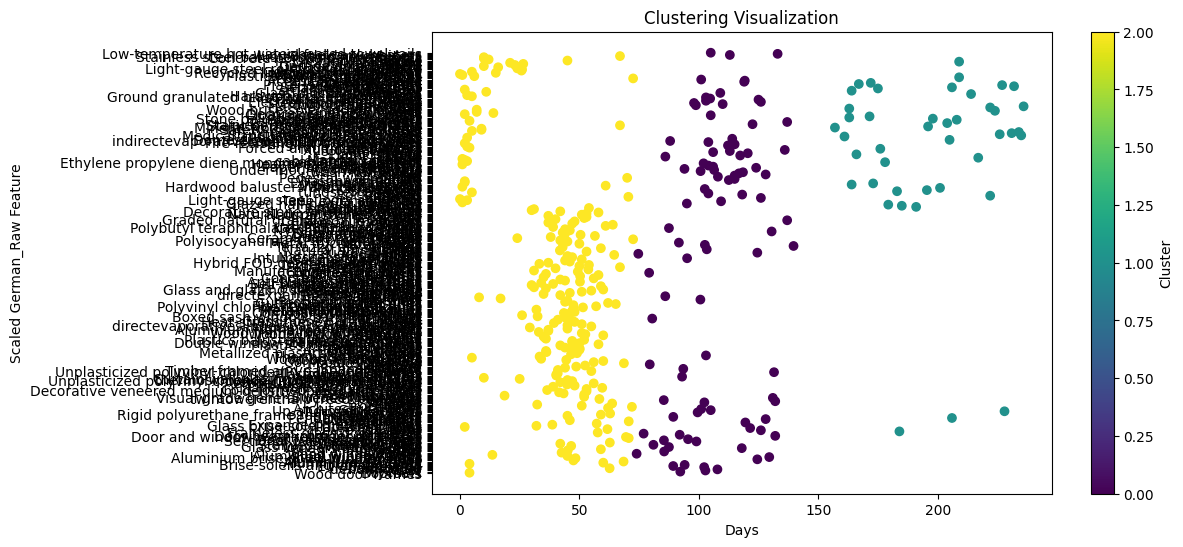

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


german_date = []
count_entity = []
price_sold = []
for item in german.German_Raw.unique():
    german_df = german.dropna(subset="SoldAfterDays")
    date = german_df.SoldAfterDays[german_df.German_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    german_date.append(np.mean(date))

df = pd.DataFrame({"German_Raw": german.German_Raw.unique(), "SoldAfterDays": german_date, "CountEntity":count_entity}).dropna()


#df = danish.reset_index()
#df = german[german.German_Raw.isin(list(unique_count_german.keys()[:40]))].reset_index()
# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
danish_raw_encoded = encoder.fit_transform(df[['German_Raw']].fillna('Missing'))

# Creating a new DataFrame with the encoded data
encoded_df = pd.DataFrame(df.German_Raw, columns=encoder.get_feature_names_out(['German_Raw']))

# Combine the encoded features with the Duration
final_df = pd.concat([encoded_df, df['SoldAfterDays']], axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(final_df)

# Clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(imputed_features)

# Add the cluster information to the original DataFrame
df['Cluster'] = clusters


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['SoldAfterDays'], df['German_Raw'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering Visualization')
plt.xlabel('Days')
plt.ylabel('Scaled German_Raw Feature')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = (df['Rank_SoldAfterDays']) + df['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)

In [ ]:
# Best German objects
successful_objects[['German_Raw', 'SoldAfterDays', 'CountEntity', 'Score']]

,German_Raw,SoldAfterDays,CountEntity,Score
134,Plastics window films,40.945946,37,7.0
25,window,45.145631,103,7.0
16,Window walls,48.365385,52,12.0
244,Marble,41.833333,12,27.0
141,Lignite,52.380952,21,28.0
22,Arrises,73.966667,30,29.0
23,Wood window walls,42.545455,11,30.0
107,parapet,85.343750,32,31.0
19,Aluminium window units,13.571429,7,36.0
203,Grommets,85.962963,27,38.0


In [ ]:
# Worst German objects
worst_objects = df.sort_values(by='Score', ascending=False)
worst_objects[['German_Raw', 'SoldAfterDays', 'CountEntity', 'Score']][:15]

,German_Raw,SoldAfterDays,CountEntity,Score
248,Terrazzo tile skirtings,139.666667,6,87.0
346,Sprigs,118.166667,6,85.0
104,Sedge,102.333333,6,76.0
415,Bidets,106.428571,7,75.0
106,turnstile,132.000000,10,74.0
131,Window sill boards,93.000000,6,71.0
685,quay,104.750000,12,63.0
237,Plaques,95.100000,10,61.0
254,Granite,72.500000,6,60.0
30,Veneers and facings,87.500000,8,59.0


In [ ]:
import pandas as pd


correlation_matrix = german.corr().abs()

# Calculate the average correlation for each column
avg_correlation = correlation_matrix.mean().sort_values(ascending=False)

# Select the top 20 columns
top_20_columns = avg_correlation.head(20).index

# Get the correlation matrix for the top 20 columns
top_20_correlation_matrix = german[top_20_columns].corr()

# Display the top 20 correlation matrix
top_20_correlation_matrix

ValueError: could not convert string to float: 'https://restado.de/baustoff/eigenbau/'

Nothing interesting here


### Danemark
#### No Date Available in the scraping

In [ ]:
danish.columns

Index(['Category', 'Category_1', 'Subcategory', 'URL', 'Title', 'ID',
       'Imagefile', 'Bredde', 'Bredde_unit', 'Højde', 'Højde_unit', 'Tykkelse',
       'Tykkelse_unit', 'Dørkarm', 'Quantity', 'LastPrice', 'Saved',
       'LastUpOn', 'Hængning', 'Bredde m/karm', 'Bredde m/karm_unit',
       'Højde m/karm', 'Højde m/karm_unit', 'Karmtykkelse',
       'Karmtykkelse_unit', 'FirstPrice', 'PriceChange', 'Description',
       'Skinne', 'Gammelt glas', 'Med hjørnebånd', 'Glas', 'Defekte glas',
       'Materiale', 'Monteret før', 'Produktionsår', 'Produktionsår_unit',
       'Til indmuring', 'Overfalset', 'Med vinkelhængsler', 'Koblet',
       'Med udskyderstang', 'Længde', 'Længde_unit', 'Dybde', 'Dybde_unit',
       'Konvektorer', 'Konvektorer_unit', 'Ophængsbeslag', 'Med termostat',
       'Trykprøvet', 'Store', 'Country', 'Language', 'Bundstykke',
       'Fyldningstype', 'Fyldningstype_unit', 'Fast ramme', 'Alu på træ'],
      dtype='object')

Index(['Unnamed: 0', 'Category', 'Category_1', 'Subcategory', 'Quantity', 'LastPrice',
        'Saved', 'LastUpOn', 'FirstPrice', 'PriceChange', 'Description',
        'Year of manufacture', 'Year of manufacture_unit',
        'For built-in', 'Over rebated', 'With angle hinges', 'Connected',
        'Press tested', 'Store', 'Country', 'Language', 'Danish_Raw'],
       dtype='object')
       

In [ ]:
danish['Saved'] = pd.to_datetime(danish['Saved'])
danish['LastUpOn'] = pd.to_datetime(danish['LastUpOn'])
danish["SoldAfterDays"] = (danish["LastUpOn"] - danish["Saved"]).dt.days

In [ ]:
sum(danish["SoldAfterDays"].isna())

0

In [ ]:
danish


,Category,Category_1,Subcategory,URL,Title,ID,Imagefile,Bredde,Bredde_unit,Højde,...,Trykprøvet,Store,Country,Language,Bundstykke,Fyldningstype,Fyldningstype_unit,Fast ramme,Alu på træ,SoldAfterDays
0,Doors and Windows,Brugte Døre,Yderdøre,/doere-vinduer/brugte-doere/yderdoere/yderdoer...,Altandørsparti,267838,['/dyn/resources/Shop_Model_Product/image/8/26...,171.0,cm,292.5,...,None,Genbyg,DK,dk,None,NaN,None,None,None,246
1,Doors and Windows,Brugte Døre,Yderdøre,/doere-vinduer/brugte-doere/yderdoere/yderdoer...,Stalddør med sidevindue,267792,['/dyn/resources/Shop_Model_Product/image/2/26...,141.5,cm,190.5,...,None,Genbyg,DK,dk,None,NaN,None,None,None,7
2,Doors and Windows,Brugte Døre,Yderdøre,/doere-vinduer/brugte-doere/yderdoere/yderdoer...,Yderdør med med karm,267676,['/dyn/resources/Shop_Model_Product/image/6/26...,99.0,cm,192.5,...,None,Genbyg,DK,dk,None,NaN,None,None,None,245
3,Doors and Windows,Brugte Døre,Yderdøre,/doere-vinduer/brugte-doere/yderdoere/yderdoer...,Yderdør med karm,267675,['/dyn/resources/Shop_Model_Product/image/5/26...,84.5,cm,208.0,...,None,Genbyg,DK,dk,None,NaN,None,None,None,128
4,Doors and Windows,Brugte Døre,Yderdøre,/doere-vinduer/brugte-doere/yderdoere/yderdoer...,Yderdør med karm,267724,['/dyn/resources/Shop_Model_Product/image/4/26...,82.5,cm,203.0,...,None,Genbyg,DK,dk,None,NaN,None,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5715,Plumbing and Kitchen,Brugt Køkken,Køkkener,/vvs-koekken/brugt-koekken/koekkener/268438/ko...,Køkkenoverskab med skydelåger,268438,['/dyn/resources/Shop_Model_Product/image/8/26...,151.0,cm,81.0,...,None,Genbyg,DK,dk,None,NaN,None,None,None,5
5716,Miscellaneous Used Items,Plader & Hylder,Plader & Hylder,/diverse-brugt/plader-hylder/268542/haandklaed...,Håndklædehylde,268542,['/dyn/resources/Shop_Model_Product/image/2/26...,51.0,cm,20.0,...,None,Genbyg,DK,dk,None,NaN,None,None,None,21
5717,Miscellaneous Used Items,Skabe,Skabe,/diverse-brugt/skabe/267482/laboratorieskab-ho...,"Laboratorieskab - Højrehængt 52,5 cm",267482,['/dyn/resources/Shop_Model_Product/image/2/26...,52.5,cm,58.0,...,None,Genbyg,DK,dk,None,NaN,None,None,None,1
5718,Miscellaneous Used Items,Skabe,Skabe,/diverse-brugt/skabe/267483/laboratorieskab-ve...,"Laboratorieskab - Venstrehængt 52,5 cm",267483,['/dyn/resources/Shop_Model_Product/image/3/26...,52.5,cm,58.0,...,None,Genbyg,DK,dk,None,NaN,None,None,None,25


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


# Identify categorical columns and convert them to dummy variables
categorical_columns = ['Category', 'Subcategory', 'Location', 'Hersteller']  # Update with your categorical columns
non_numeric_columns = ['URL', 'Title', 'Saved', 'LastUpOn', "SoldAfter", 'Description', 'Zustand', 'FirstPrice', 'FirstAvailable', 'MinAmount', 'Properties', 'LastPrice', 'LastAvailable', 'German_Raw']
german.Sold[german.SoldAfter!=1] = 0
german.Sold[german.SoldAfter>0] = 1

df = german[categorical_columns].copy()


df_dummies = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target
X = pd.concat([german.LastPriceNumeric, df_dummies], axis=1) # Replace 'Sold' with your target column name
y = german['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


danish_date = []
count_entity = []
price_sold = []
for item in danish.Danish_Raw.unique():
    danish_df = danish.dropna(subset="SoldAfterDays")
    date = danish_df.SoldAfterDays[danish_df.Danish_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    danish_date.append(np.mean(date))

df = pd.DataFrame({"Danish_Raw": danish.Danish_Raw.unique(), "SoldAfterDays": danish_date, "CountEntity":count_entity}).dropna()


#df = danish.reset_index()
#df = german[german.German_Raw.isin(list(unique_count_german.keys()[:40]))].reset_index()
# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
danish_raw_encoded = encoder.fit_transform(df[['Danish_Raw']].fillna('Missing'))

# Creating a new DataFrame with the encoded data
encoded_df = pd.DataFrame(df.Danish_Raw, columns=encoder.get_feature_names_out(['Danish_Raw']))

# Combine the encoded features with the Duration
final_df = pd.concat([encoded_df, df['SoldAfterDays']], axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(final_df)

# Clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(imputed_features)

# Add the cluster information to the original DataFrame
df['Cluster'] = clusters


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['SoldAfterDays'], df['Danish_Raw'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering Visualization')
plt.xlabel('Days')
plt.ylabel('Scaled Denmark_Raw Feature')
plt.colorbar(label='Cluster')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'Danish_Raw'

In [ ]:
# Value 

In [ ]:
import re
def extract_numeric(s):
    # Find all numeric patterns in the string
    number = re.findall(r'\b\d+\b', str(s))
    # Return them as a space-separated string (or however you'd like to format it)
    if len(number)==0:
        return np.nan
    else: 
        return int(number[0])

danish.Quantity = danish.Quantity.apply(extract_numeric)

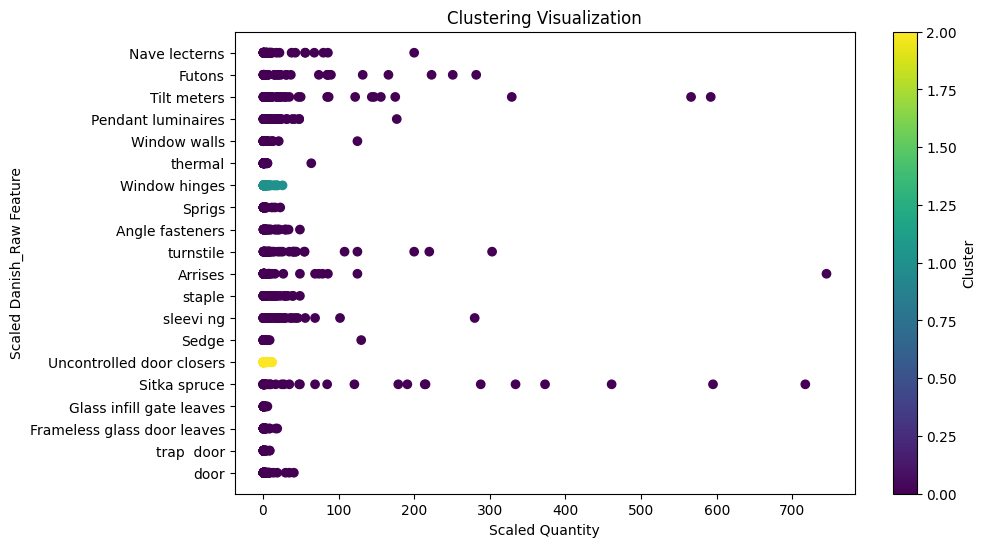

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


#df = danish.reset_index()
df = danish[danish.Danish_Raw.isin(list(unique_count_danish.keys()[:20]))].reset_index()
# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
danish_raw_encoded = encoder.fit_transform(df[['Danish_Raw']].fillna('Missing'))

# Creating a new DataFrame with the encoded data
encoded_df = pd.DataFrame(danish_raw_encoded, columns=encoder.get_feature_names_out(['Danish_Raw']))

# Combine the encoded features with the Duration
final_df = pd.concat([encoded_df, df['Quantity']], axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(final_df)

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_features)

# Clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster information to the original DataFrame
df['Cluster'] = clusters


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Danish_Raw'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering Visualization')
plt.xlabel('Scaled Quantity')
plt.ylabel('Scaled Danish_Raw Feature')
plt.colorbar(label='Cluster')
plt.show()

# Do an average and do it for prices

In [ ]:
import pandas as pd


correlation_matrix = danish.corr().abs()

# Calculate the average correlation for each column
avg_correlation = correlation_matrix.mean().sort_values(ascending=False)

# Select the top 20 columns
top_20_columns = avg_correlation.head(20).index

# Get the correlation matrix for the top 20 columns
top_20_correlation_matrix = danish[top_20_columns].corr()

# Display the top 20 correlation matrix
top_20_correlation_matrix

,Fyldningstype,Konvektorer,LastPrice,Bredde,PriceChange,FirstPrice,Dybde,Bredde m/karm,Længde,Højde,Tykkelse,ID,Karmtykkelse,SoldAfterDays,Quantity,Højde m/karm,Produktionsår,Produktionsår_unit,Konvektorer_unit
Fyldningstype,1.0,NaN,-1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,-1.000000,1.000000,NaN,NaN,NaN,NaN
Konvektorer,NaN,1.000000,-0.977356,-0.866025,NaN,NaN,0.628619,NaN,NaN,1.000000,NaN,0.869379,NaN,0.500000,0.500000,NaN,NaN,NaN,NaN
LastPrice,-1.0,-0.977356,1.000000,0.425863,0.718412,0.935893,0.128558,0.815840,0.385058,0.249511,0.311517,0.262134,-0.049694,-0.128874,-0.093155,0.045025,NaN,NaN,NaN
Bredde,1.0,-0.866025,0.425863,1.000000,0.674797,0.691588,-0.169006,1.000000,-0.276412,0.117008,0.178076,0.064155,-0.042773,-0.036694,-0.117415,0.047683,NaN,NaN,NaN
PriceChange,NaN,NaN,0.718412,0.674797,1.000000,0.917412,0.392249,0.781633,0.039281,0.407490,0.230284,0.099841,0.296067,-0.028617,-0.081554,0.029925,NaN,NaN,NaN
FirstPrice,NaN,NaN,0.935893,0.691588,0.917412,1.000000,0.238993,0.606048,0.011818,0.461635,0.307256,0.230450,0.076914,-0.063588,-0.101032,-0.017119,NaN,NaN,NaN
Dybde,NaN,0.628619,0.128558,-0.169006,0.392249,0.238993,1.000000,NaN,-1.000000,0.097965,-0.791984,0.129540,NaN,-0.047500,-0.040559,NaN,NaN,NaN,NaN
Bredde m/karm,NaN,NaN,0.815840,1.000000,0.781633,0.606048,NaN,1.000000,NaN,0.047683,-0.077819,-0.026029,-0.045044,0.093022,0.001465,0.047683,NaN,NaN,NaN
Længde,NaN,NaN,0.385058,-0.276412,0.039281,0.011818,-1.000000,NaN,1.000000,0.505719,0.223474,0.232044,NaN,0.142148,0.174807,NaN,NaN,NaN,NaN
Højde,NaN,1.000000,0.249511,0.117008,0.407490,0.461635,0.097965,0.047683,0.505719,1.000000,0.160501,0.046126,0.006680,0.077252,-0.137354,1.000000,NaN,NaN,NaN


### Belgium

In [ ]:
belgium.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Title', 'Weight', 'Weight_Units',
       'Product_Units', 'Description', 'Category', 'URL', 'Imagefile',
       'Initial_Price', 'Latest_Price', 'Initial_Stock', 'Stock_Now',
       'Condition', 'Dates_Available', 'Material', 'Dimensions', 'Technical',
       'Collection', 'Last_Up_On', 'Price_Change', 'Quantity_Change', 'Date',
       'Country', 'Store', 'Language', 'Sold', 'Sold_After', 'material', 'dim',
       'quantity_n', 'Belgium_Raw'],
      dtype='object')

In [ ]:
belgium['Date'] = pd.to_datetime(belgium['Date'])
belgium['Last_Up_On'] = pd.to_datetime(belgium['Last_Up_On'])
belgium["SoldAfterDays"] = (belgium["Last_Up_On"] - belgium["Date"]).dt.days

In [ ]:
belgium_date_analysis = belgium.dropna(subset=['Date', 'Last_Up_On'])

In [ ]:
belgium_date = []
count_entity = []
price_sold = []
for item in belgium.Belgium_Raw.unique():
    belgium_df = belgium.dropna(subset="SoldAfterDays")
    date = belgium_df.SoldAfterDays[belgium_df.Belgium_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    belgium_date.append(np.mean(date))

df_belgium = pd.DataFrame({"Belgium_Raw": belgium.Belgium_Raw.unique(), "SoldAfterDays": belgium_date, "CountEntity":count_entity}).dropna()
    

In [ ]:
belgium['Weight'] = pd.to_numeric(belgium['Weight'].str.replace('[^0-9.]', '', regex=True).str.replace(',', ''), errors='coerce')
belgium['Initial_Price'] = pd.to_numeric(belgium['Initial_Price'].str.replace('[^0-9.]', '', regex=True).str.replace(',', ''), errors='coerce')

# Check the conversion results
print(belgium[['Weight', 'Initial_Price']].dtypes)

Weight           float64
Initial_Price    float64
dtype: object


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ['Category', 'Condition', "Belgium_Raw"]  # Update with your categorical columns
numeric_columns = ['Weight','Latest_Price']

df = belgium[categorical_columns+numeric_columns]

df_dummies = pd.get_dummies(df, columns=categorical_columns)


# Separate features and target
X = df_dummies # Replace 'Sold' with your target column name
y = belgium['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.739240506329114
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       259
           1       0.63      0.60      0.61       136

    accuracy                           0.74       395
   macro avg       0.71      0.71      0.71       395
weighted avg       0.74      0.74      0.74       395



                             Feature  Importance
10                    Category_Floor    0.136195
331         Belgium_Raw_Quarry tiles    0.058703
432       Belgium_Raw_Terrazzo tiles    0.048577
6                      Category_Door    0.042626
12                Category_Furniture    0.032879
..                               ...         ...
196  Belgium_Raw_Glass louvre blades    0.000000
194        Belgium_Raw_Glass bottles    0.000000
193         Belgium_Raw_Glass blocks    0.000000
192     Belgium_Raw_General hardware    0.000000
554         Belgium_Raw_weather side    0.000000

[555 rows x 2 columns]


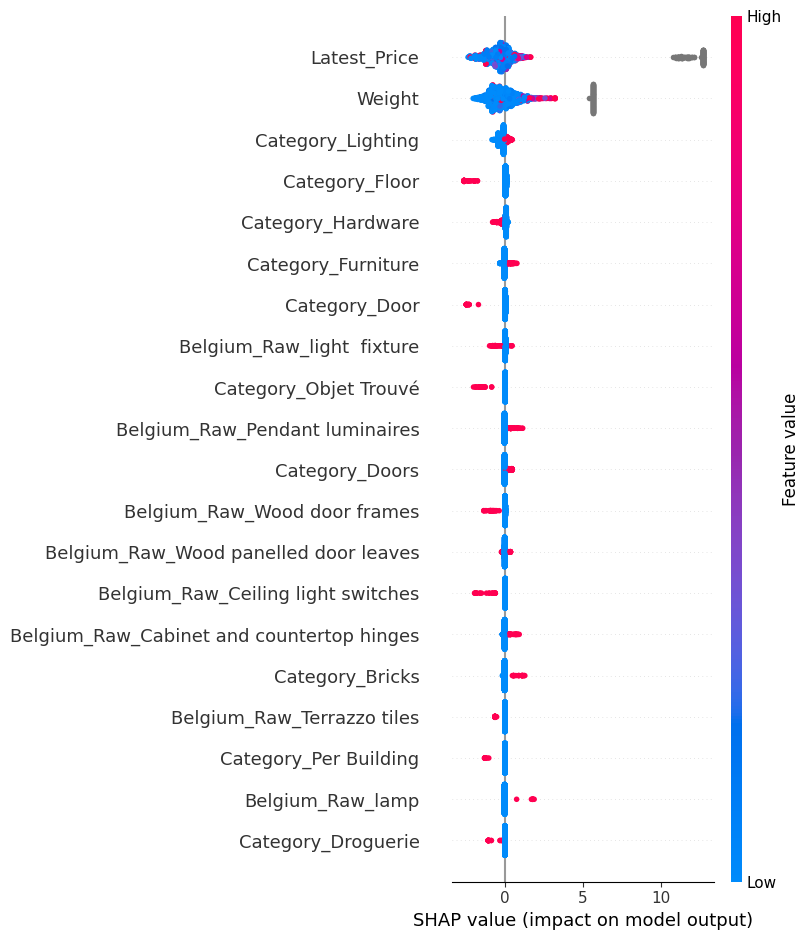

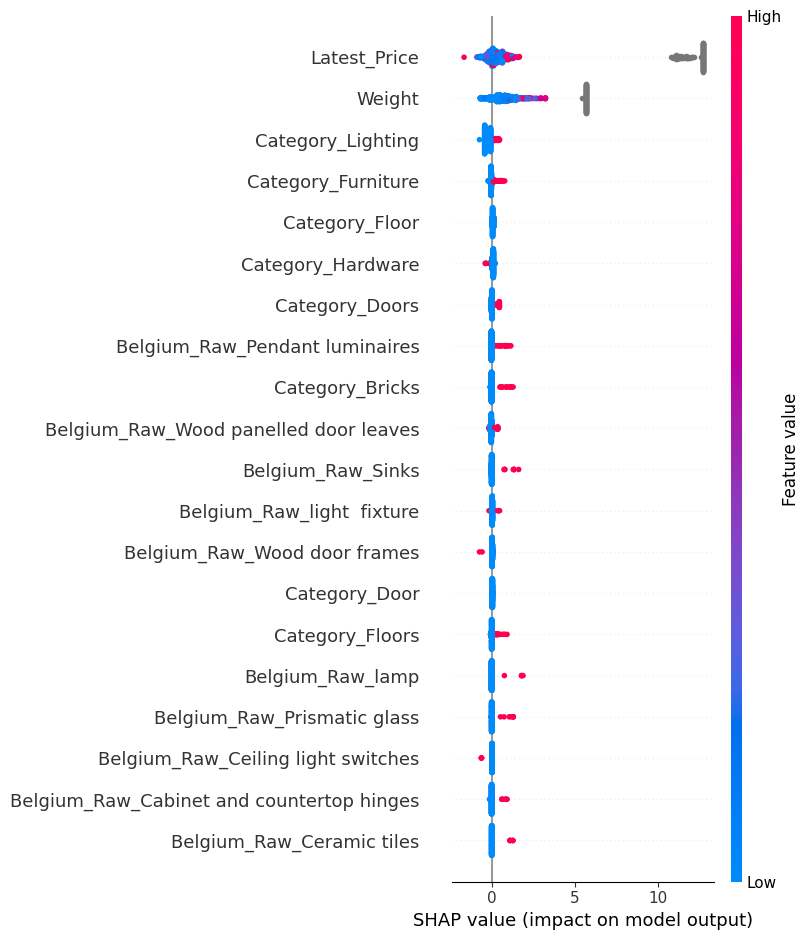

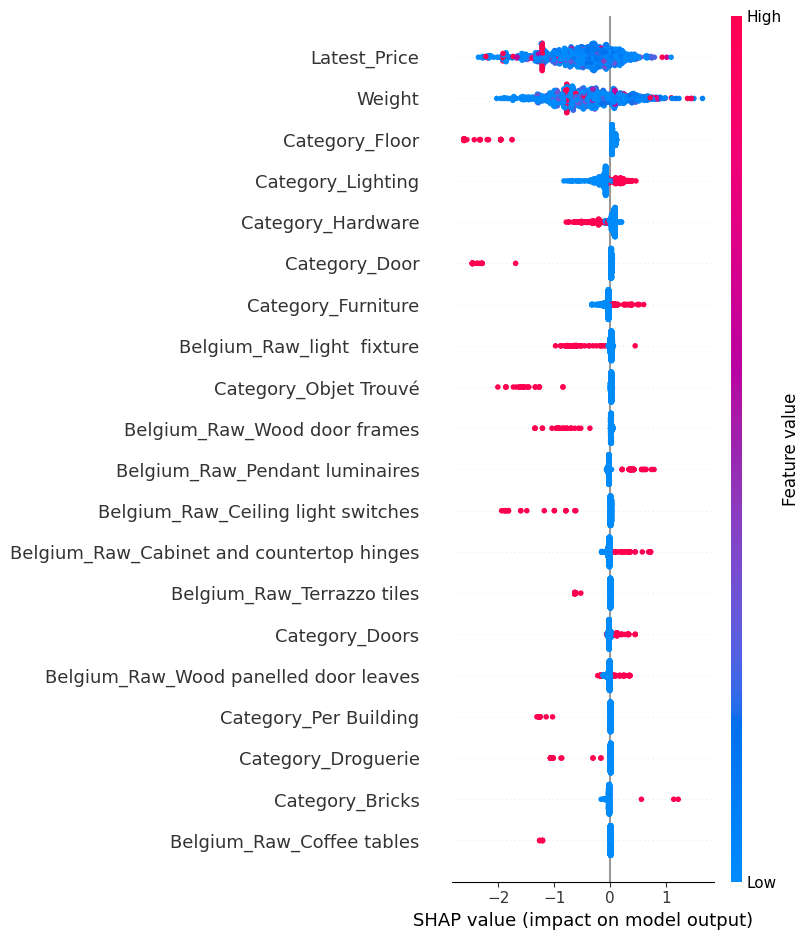

In [ ]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display
print(feature_importances)
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


df = df_belgium

#df = danish.reset_index()
#df = german[german.German_Raw.isin(list(unique_count_german.keys()[:40]))].reset_index()
# One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
danish_raw_encoded = encoder.fit_transform(df[['Belgium_Raw']].fillna('Missing'))

# Creating a new DataFrame with the encoded data
encoded_df = pd.DataFrame(df.Belgium_Raw, columns=encoder.get_feature_names_out(['Belgium_Raw']))

# Combine the encoded features with the Duration
final_df = pd.concat([encoded_df, df['SoldAfterDays']], axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(final_df)

# Clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(imputed_features)

# Add the cluster information to the original DataFrame
df['Cluster'] = clusters


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['SoldAfterDays'], df['Belgium_Raw'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering Visualization')
plt.xlabel('Days')
plt.ylabel('Scaled Denmark_Raw Feature')
plt.colorbar(label='Cluster')
plt.show()


NameError: name 'df_belgium' is not defined

In [ ]:
df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = (df['Rank_SoldAfterDays']) + df['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)

NameError: name 'df' is not defined

In [ ]:
# Best German objects
successful_objects[['Belgium_Raw', 'SoldAfterDays', 'CountEntity', 'Score']]

NameError: name 'successful_objects' is not defined

In [ ]:
revenue_idx = belgium.Sold == 1
revenue = np.sum(belgium.Latest_Price[revenue_idx])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 76348.3


### French

In [ ]:
french.columns

Index(['id', 'title', 'description', 'material_state', 'category', 'BIM_class',
       'location', 'date_published', 'price_initial', 'price_latest',
       'price_change', 'imagefiles', 'material_type', 'co2', 'avoided_waste',
       'quantity_initial', 'quantity_latest', 'disappeared', 'country', 'sold',
       'sold_after', 'city', 'deconstruction', 'state', 'constraints', 'price',
       'distance', 'rseSummary', 'promotion', 'source', 'conditioning', 'rate',
       'diag_it', 'showroom', 'avoidedWastes', 'trustLevel', 'quantity',
       'min_quantity', 'end_date', 'pickup_start_date', 'pickup_end_date',
       'deposit_mode'],
      dtype='object')

In [ ]:
french.sold[french.sold!=1] = 0
french.sold[french.sold>0] = 1
french.sold

C:\Users\abder\AppData\Local\Temp\ipykernel_16600\2223036177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  french.sold[french.sold!=1] = 0
C:\Users\abder\AppData\Local\Temp\ipykernel_16600\2223036177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  french.sold[french.sold>0] = 1


0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6993    0.0
6994    0.0
6995    0.0
6996    0.0
6997    0.0
Name: sold, Length: 6998, dtype: float64

In [ ]:
french = french.dropna(subset=["price_initial"])

In [ ]:
french.date_published = pd.to_datetime(french.date_published)
data = sorted(list(french.date_published))
print("French Table starts the " + str(data[0]) + " and ends the " + str(data[-1]))

French Table starts the 2020-12-01 00:00:00 and ends the 2023-05-24 00:00:00


In [ ]:
french.location = french.location.astype(str)

In [ ]:
french.avoided_waste 

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
5328     0.0
5329     0.0
5330     0.0
5331    22.8
5332     0.0
Name: avoided_waste, Length: 5333, dtype: float64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ['location', "French_Raw", "material_state", "BIM_class", "material_type"]  # Update with your categorical columns
numeric_columns = ['price_initial', "co2", "avoided_waste"]
french.sold[french.sold!=1] = 0
french.sold[french.sold>0] = 1

df = french[categorical_columns+numeric_columns]

df_dummies = pd.get_dummies(df, columns=categorical_columns)


# Separate features and target
X = df_dummies # Replace 'Sold' with your target column name
y = french['sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
french_date = []
count_entity = []
price_sold = []
for item in french.French_Raw.unique():
    french_df = french.dropna(subset="sold_after")
    date = french_df.sold_after[french_df.French_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    french_date.append(np.mean(date))

df = pd.DataFrame({"French_Raw": french.French_Raw.unique(), "SoldAfterDays": french_date, "CountEntity":count_entity}).dropna()

AttributeError: 'DataFrame' object has no attribute 'French_Raw'

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

encoder = OneHotEncoder(sparse=False)
danish_raw_encoded = encoder.fit_transform(df[['French_Raw']].fillna('Missing'))

# Creating a new DataFrame with the encoded data
encoded_df = pd.DataFrame(df.French_Raw, columns=encoder.get_feature_names_out(['French_Raw']))

# Combine the encoded features with the Duration
final_df = pd.concat([encoded_df, df['SoldAfterDays']], axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(final_df)

# Clustering
kmeans = KMeans(n_clusters=3)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(imputed_features)

# Add the cluster information to the original DataFrame
df['Cluster'] = clusters


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['SoldAfterDays'], df['French_Raw'], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering Visualization')
plt.xlabel('Days')
plt.ylabel('Scaled French_Raw Feature')
plt.colorbar(label='Cluster')
plt.show()



NameError: name 'df' is not defined

In [ ]:
df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)
successful_objects[['French_Raw', 'SoldAfterDays', 'CountEntity', 'Score']]

NameError: name 'df' is not defined

In [ ]:
best_objects = df.sort_values(by='Score', ascending=True)
best_objects[:15]

NameError: name 'df' is not defined

In [ ]:
worst_objects = df.sort_values(by='Score', ascending=False)
worst_objects[:15]

NameError: name 'df' is not defined

In [ ]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display
print(feature_importances)
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

NameError: name 'model_xgb' is not defined

In [ ]:
import pandas as pd


correlation_matrix = french.corr().abs()

# Calculate the average correlation for each column
avg_correlation = correlation_matrix.mean().sort_values(ascending=False)

# Select the top 20 columns
top_20_columns = avg_correlation.head(20).index

# Get the correlation matrix for the top 20 columns
top_20_correlation_matrix = french[top_20_columns].corr()

# Display the top 20 correlation matrix
top_20_correlation_matrix

ValueError: could not convert string to float: '00249fb6-3011-411f-a276-7f92e35a8981'

In [ ]:
revenue_idx = french.sold == 1
revenue = sum(french.price_latest[revenue_idx])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 215883.53000000006


### Swiss

In [ ]:
swiss.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Title', 'Condition', 'eBKP_H',
       'eBKP_H_EN', 'MateriuumCategory', 'Category', 'Category_1',
       'Subcategory', 'Description', 'Material', 'Length', 'Width', 'Height',
       'Diameter', 'Weight', 'Color', 'Energy_Efficiency', 'Availability',
       'FirstPrice', 'PriceOnDemand', 'Quantity', 'Saved', 'LastPrice',
       'LastUpOn', 'PriceChange', 'Sold', 'SoldAfter', 'Location', 'Provider',
       'Store', 'ID', 'Country', 'Language', 'Imagefile', 'URL',
       'eBKP_H_Generalized', 'ElementType', 'Price', 'Stock', 'Dimensions',
       'material', 'dim', 'quantity_n', 'Swiss_Raw'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


categorical_columns = ['Category', "Swiss_Raw", "Condition", "Subcategory", "Material", "Energy_Efficiency"]  # Update with your categorical columns
numeric_columns = ['LastPrice', "Quantity"]
swiss.Sold[swiss.Sold!=1] = 0
swiss.Sold[swiss.Sold>0] = 1

df = swiss[categorical_columns+numeric_columns]

df_dummies = pd.get_dummies(df, columns=categorical_columns)


# Separate features and target
X = df_dummies # Replace 'Sold' with your target column name
y = swiss['Sold']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on the test set
predictions = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Accuracy: 0.9493521790341578
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.80      0.87       172
         1.0       0.95      0.99      0.97       677

    accuracy                           0.95       849
   macro avg       0.95      0.89      0.92       849
weighted avg       0.95      0.95      0.95       849



                                 Feature  Importance
996                     Material_Keramik    0.142111
1019                   Material_gemischt    0.121834
1001                     Material_Metall    0.070385
889                  Condition_gebraucht    0.051135
995                        Material_Holz    0.043047
...                                  ...         ...
351             Swiss_Raw_Lacquer resins    0.000000
352                   Swiss_Raw_Lacquers    0.000000
353   Swiss_Raw_Laminboard core plywoods    0.000000
354              Swiss_Raw_Lamprey tiles    0.000000
1026                 Energy_Efficiency_G    0.000000

[1027 rows x 2 columns]


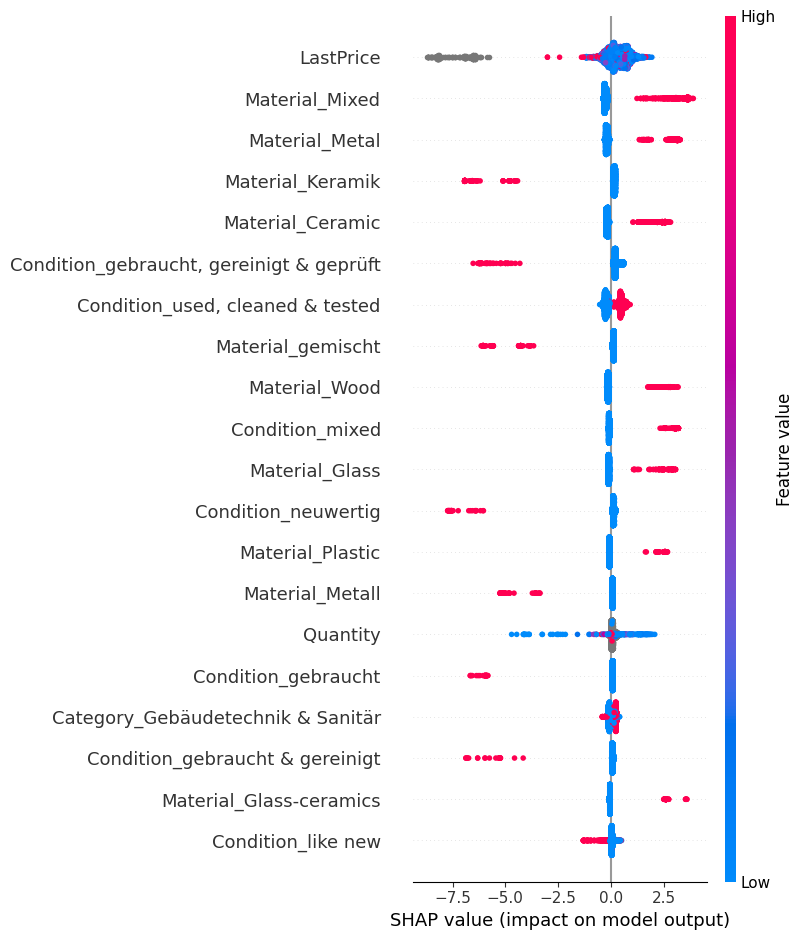

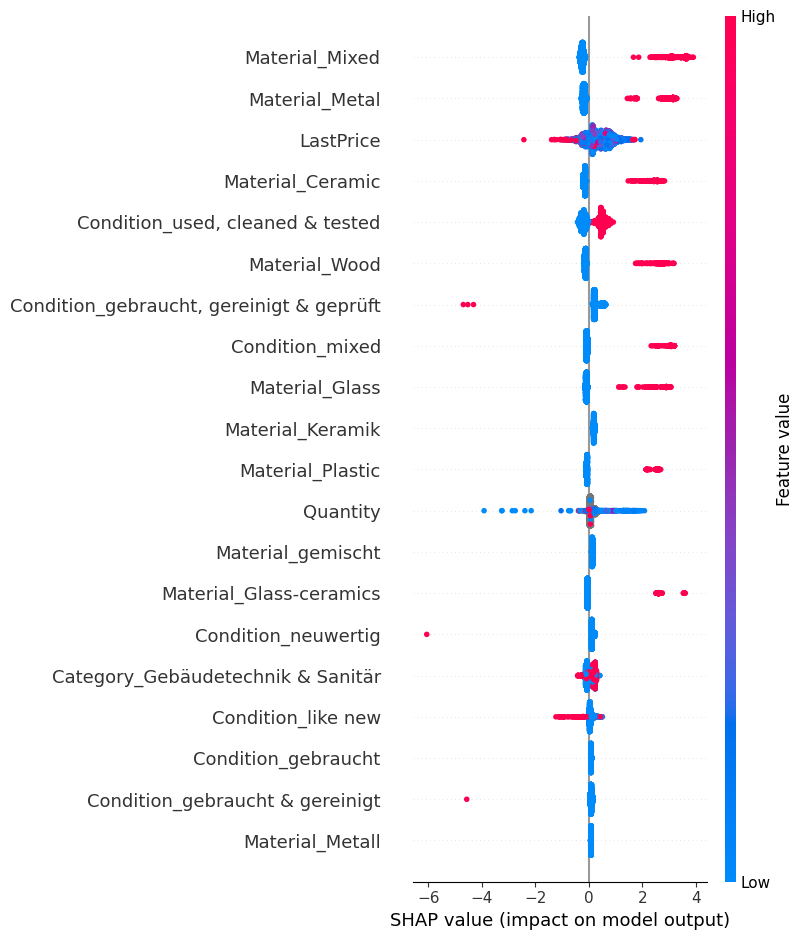

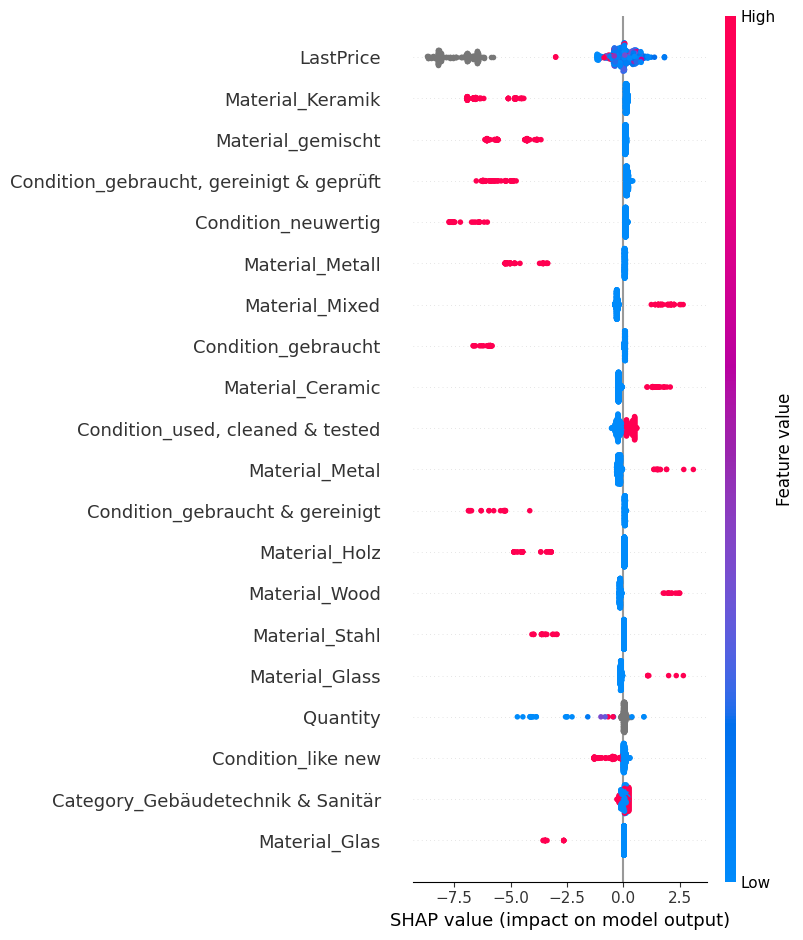

In [ ]:
# Get feature importances
importances = model_xgb.feature_importances_
# Get feature names
feature_names = X_train.columns
# Create a DataFrame for easy visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Display
print(feature_importances)
import shap

explainer = shap.Explainer(model_xgb)

shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

# For example, to examine instances predicted as 1
predicted_ones = model_xgb.predict(X_train) == 1
shap.summary_plot(shap_values[predicted_ones], X_train[predicted_ones])

# And for instances predicted as 0
predicted_zeros = model_xgb.predict(X_train) == 0
shap.summary_plot(shap_values[predicted_zeros], X_train[predicted_zeros])

In [ ]:
swiss_date = []
count_entity = []
price_sold = []
for item in swiss.Swiss_Raw.unique():
    swiss_df = swiss.dropna(subset="SoldAfter")
    date = swiss_df.SoldAfter[swiss_df.Swiss_Raw == item]
    #units = np.nansum(german_df.StockChange[german_df.German_Raw == item])
    #print(units)
    #price_sold.append(units)
    count_entity.append(len(date))
    swiss_date.append(np.mean(date))

df = pd.DataFrame({"Swiss_Raw": swiss.Swiss_Raw.unique(), "SoldAfterDays": swiss_date, "CountEntity":count_entity}).dropna()

In [ ]:
df = df[df.CountEntity > 5]
df['Rank_SoldAfterDays'] = df['SoldAfterDays'].rank(method='min', ascending=True)
df['Rank_CountEntity'] = df['CountEntity'].rank(method='min', ascending=False)

# Normalize the ranks to combine them
# Here we inversely transform the 'SoldAfterDays' rank since lower days should be better
df['Score'] = df['Rank_SoldAfterDays'] + df['Rank_CountEntity']

# Sort the DataFrame by the new 'Score' column in descending order
# Higher score indicates faster selling and in greater quantity
successful_objects = df.sort_values(by='Score', ascending=True)

In [ ]:
revenue_idx = swiss.Sold == 1
revenue = sum(swiss.LastPrice[revenue_idx])
print("The revenue generated over the studied timeframe is " + str(revenue))

The revenue generated over the studied timeframe is 1149785.0


## UK


In [ ]:
MODELQA = False
if MODELQA:    
    def model_query(query, text):
        res = qa_model(question = query, context = text)
        return res
    french = pd.read_csv("data/french_.csv")
    descr_to_fill  = french
    from tqdm.auto import tqdm

    tqdm.pandas()

    #query = "What object is it?"
    #descr_to_fill["object"] = descr_to_fill.description.progress_apply(lambda x : model_query(query, x))
    #query = "What material is it?"
    #descr_to_fill["material"] = descr_to_fill.description.progress_apply(lambda x : model_query(query, x))
    #query = "What are the dimensions?"
    #descr_to_fill["dim"] = descr_to_fill.description.progress_apply(lambda x : model_query(query, x))
    #query = "What is the state between new,very good, correct or bad?"
    #descr_to_fill["state"] = descr_to_fill.description.progress_apply(lambda x : model_query(query, x))
    query = "What is the quantity?"
    descr_to_fill["quantity_n"] = descr_to_fill.description.progress_apply(lambda x : model_query(query, x))
    import numpy as np
    def extract(row):
        if row['score']>0.5:
            return row['answer']
        else:
            return np.nan

    descr_to_fill['quantity_n'] = descr_to_fill["quantity_n"].apply(extract)
    descr_to_fill.to_csv("data/french_.csv")
    #descr_to_fill = descr_to_fill.drop(columns=['Unnamed: 0'])
    #descr_to_fill = descr_to_fill.drop(columns=['Unnamed: 0.1'])
    descr_to_fill = descr_to_fill.drop(columns=['rate','diag_it','showroom','avoidedWastes','trustLevel','quantity','min_quantity', 'end_date', 'pickup_start_date', 'pickup_end_date', 'deposit_mode', 'date'])
    descr_to_fill = descr_to_fill.dropna(axis=1, how='all')

    missing_percentage = descr_to_fill.isnull().mean() * 100
    missing_percentage_df = pd.DataFrame(missing_percentage).reset_index()
    missing_percentage_df.columns = ['Column', 'Missing Percentage']

    missing_percentage_df
    descr_to_fill['date_published'] = pd.to_datetime(descr_to_fill['date_published'])
    descr_to_fill['disappeared'] = pd.to_datetime(descr_to_fill['disappeared'])
    descr_to_fill['duration_on_market'] = (descr_to_fill['disappeared'] - descr_to_fill['date_published']).dt.days

    missing_values_duration = descr_to_fill['duration_on_market'].isnull().sum()

    basic_stats = descr_to_fill.describe(include='all')

    correlations = descr_to_fill.corr()

    display(missing_values_duration)
    display(basic_stats)
    display(correlations)
    descr_to_fill = descr_to_fill.dropna(subset=["duration_on_market", "price_latest"])
    descr_to_fill.columns